In [10]:
#Option Price comparison between Black Scholes and Monte Carlo
import numpy as np
from math import sqrt, log, exp
from scipy.stats import norm

rng=np.random.default_rng(1232)

def mc_eur_call(S0,K,r,sigma,T,N):
    Z=rng.normal(0,1,N)
    S_T= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(S_T-K,0.0)
    disc_payoff= np.exp(-r*T)*(payoff)
    price=np.mean(disc_payoff)
    sd=disc_payoff.std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2)

def bs_call(S0,K,r,sigma,T):
    d1=(log(S0/K)+(r + (sigma**2)/2))/sigma*sqrt(T)
    d2=d1-sigma*sqrt(T)
    price=S0*norm.cdf(d1) - K*exp(-r*T)*norm.cdf(d2)
    return price
    
price1,ci= mc_eur_call(95,100,.03,.2,1,1000000)
price2= bs_call(95,100,.03,.2,1)
if ci[0]<price2<ci[1]:
    print(f"The BS price is {price2:.2f} which is in range of the Monte Carlo price {price1:.2f}")
print(f"The price of the option using Monte Carolo is: {price1 :.2f} with confidence interval of 95% the range is {ci[0]:.2f} and {ci[1]:.2f}")

The BS price is 6.67 which is in range of the Monte Carlo price 6.66
The price of the option using Monte Carolo is: 6.66 with confidence interval of 95% the range is 6.64 and 6.69


In [21]:
import numpy as np
from math import sqrt, log, exp
from scipy.stats import norm

rng=np.random.default_rng(1232)

def mc_eur_call_anti(S0,K,r,sigma,T,N):
    Z1=rng.normal(0,1,N)
    Z2=-Z1
    S_T_1= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z1)
    S_T_2=S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z2)
    payoff1 = np.maximum(S_T_1-K,0.0)
    payoff2 = np.maximum(S_T_2-K,0.0)
    disc_payoff_1= np.exp(-r*T)*(payoff1)
    disc_payoff_2= np.exp(-r*T)*(payoff2)
    #price1=np.mean(disc_payoff_1)
    #price2=np.mean(disc_payoff_2)
    X_hat=(disc_payoff_1+disc_payoff_2)/2
    price=np.mean(X_hat)
    sd=(X_hat).std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2),sd

def mc_eur_call(S0,K,r,sigma,T,N):
    Z=rng.normal(0,1,N)
    S_T= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(S_T-K,0.0)
    disc_payoff= np.exp(-r*T)*(payoff)
    price=np.mean(disc_payoff)
    sd=disc_payoff.std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2),sd
    
price1,ci1,se1= mc_eur_call(95,100,.03,.2,1,100000)
price2,ci2,se2= mc_eur_call_anti(95,100,.03,.2,1,100000)

variance_reduction_factor=se1**2/se2**2
print(f"The Variance Reduction Factor from using -Z values was: {variance_reduction_factor:.3f}")
print(f"{price1:.2f}, {ci1[0]:.2f},{ci1[1]:.2f}")


The Variance Reduction Factor from using -Z values was: 2.957
6.71, 6.64,6.78


In [24]:
import numpy as np

rng=np.random.default_rng(1234)

def mc_asian_arith_call(S0,K,r,sigma,T,M,N):
    Z=rng.normal(0,1,(N,M))
    S_t=np.zeros((N,M))
    S_t[:,0]=S0
    dT=T/M

    drift=(r-(0.5*sigma**2))*dT
    vol=sigma*np.sqrt(dT)

    for t in range(1,M):
        S_t[:,t]=S_t[:,t-1]*np.exp(drift+vol*Z[:,t-1])
    
    avg_price=S_t.mean(axis=1)
    payoff=np.maximum(avg_price-K,0.0)
    disc_payoff=np.exp(-r*T) * payoff
    price=np.mean(disc_payoff)

    return(price)

price_asian=mc_asian_arith_call(100,105,.03,.15,1,252,100000)

print(f"Price of the Asian option with strike 105 when underlying price is at 100: {price_asian :.2f}")
        
    

Price of the Asian option with strike 105 when underlying price is at 100: 2.03


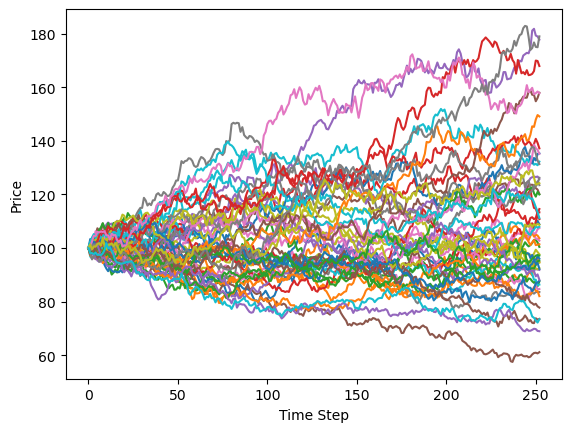

Price of the Asian option with strike 110 when underlying price is at 100: 1.99


In [58]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.default_rng(12345)

def mc_asian_arith_call_vectorized(S0,K,r,sigma,T,M,N):
    Z=rng.normal(0,1,(N,M))
    S_t=np.zeros((N,M+1))
    S_t[:,0]=S0
    dT=T/M

    drift=(r-(0.5*sigma**2))*dT
    vol=sigma*np.sqrt(dT)
    log_path=drift+vol*Z
    log_returns=np.cumsum(log_path,axis=1)
    S_t[:,1:]=S0*np.exp(log_returns)
    
    avg_price=S_t.mean(axis=1)
    payoff=np.maximum(avg_price-K,0.0)
    disc_payoff=np.exp(-r*T) * payoff
    price=np.mean(disc_payoff)

    plt.plot(S_t[:50,].T)
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.show()

    return price

price_asian=mc_asian_arith_call_vectorized(100,110,.05,.20,1,252,100000)
print(f"Price of the Asian option with strike 110 when underlying price is at 100: {price_asian :.2f}")


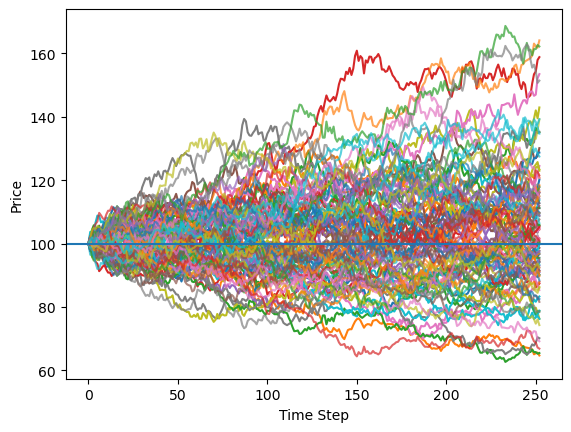

Price of the Asian option with strike 110 when underlying price is at 100: 1.98


In [69]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.default_rng(1237)

def mc_asian_arith_call_vectorized_neg(S0,K,r,sigma,T,M,N):
    Z1=rng.normal(0,1,(N,M))
    Z2=-Z1
    S_t1=np.zeros((N,M+1))
    S_t2=np.zeros((N,M+1))
    S_t1[:,0]=S0
    S_t2[:,0]=S0
    dT=T/M

    drift=(r-(0.5*sigma**2))*dT
    vol=sigma*np.sqrt(dT)
    log_path1=drift+vol*Z1
    log_path2=drift+vol*Z2
    log_returns1=np.cumsum(log_path1,axis=1)
    log_returns2=np.cumsum(log_path2,axis=1)
    S_t1[:,1:]=S0*np.exp(log_returns1)
    S_t2[:,1:]=S0*np.exp(log_returns2)
    
    avg_price1=S_t1.mean(axis=1)
    avg_price2=S_t2.mean(axis=1)
    payoff1=np.maximum(avg_price1-K,0.0)
    payoff2=np.maximum(avg_price2-K,0.0)
    disc_payoff1=np.exp(-r*T) * payoff1
    disc_payoff2=np.exp(-r*T) * payoff2
    price=np.mean((disc_payoff1+disc_payoff2)/2)

    plt.plot(S_t1[:50,].T,alpha=1)
    plt.plot(S_t2[:50,].T,alpha=0.7)
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.axhline(y=100)
    plt.show()

    return price

price_asian=mc_asian_arith_call_vectorized_neg(100,110,.05,.20,1,252,100000)
print(f"Price of the Asian option with strike 110 when underlying price is at 100: {price_asian :.2f}")


In [101]:
import numpy as np
import matplotlib.pyplot as plt
rng=np.random.default_rng(123456)

def mc_digital_call(S0,K,r,sigma,T,N):
    Z1=rng.normal(0,1,N)
    Z2=-Z1
    drift=(r-0.5*sigma**2)*T
    vol=sigma*np.sqrt(T)
    S_T_1=S0*np.exp(drift+vol*Z1)
    S_T_2=S0*np.exp(drift+vol*Z2)
    payoff1=np.where(S_T_1-K>0,1,0)
    payoff2=np.where(S_T_2-K>0,1,0)
    
    disc_payoff1=np.exp(-r*T)*payoff1
    disc_payoff2=np.exp(-r*T)*payoff2
    price=np.mean((disc_payoff1+disc_payoff2)/2)
    se1=disc_payoff1.std(ddof=1)/np.sqrt(N)
    se2=((disc_payoff1+disc_payoff2)/2).std(ddof=1)/np.sqrt(N)
    return price, (se1,se2)

price,se=mc_digital_call(100,100,0.1,.6,2,100000)
var_red=se[0]/se[1]
print(f"Price of digital option is: {price :.2f} and variance reduction factor is {var_red :.2f}")
    

Price of digital option is: 0.35 and variance reduction factor is 2.77


In [83]:
rng=np.random.default_rng(1)
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.